In [16]:
# figure out geometry - get right number of strips, right dimemsions

# put cuts on the x and y and get the real interaction positions fed i, check energies. 3 * 0.5mm = 1.5 mm
# somehow pass the number of interactions per strip from G4 to adl3 to here (separate text file?)

# make a set of sample signals in a grid under center strip (only a column for starters)

# construct an event and process it

# check noise level (20 mV?)

# add blurring (moving avg window in adl3)

# construct a chain of events, save it

# be able to spot/ separate events, reject pile-up with an estimate of the fraction of those

# do the chi2 for all strips comparison

# calculate the posres via ren's method

In [17]:
from __future__ import division, print_function
from math import floor
import numpy as np
import matplotlib.pyplot as plt
import sys
import scipy.stats as stats

In [18]:
# IMPORT DATA
def ImportData():
    data = np.zeros((number_interactions_total, number_strips, number_samples))
    for i in range(0, number_interactions_total, 1):
        i = int(i)
        print(i)
        filename = "Strip_SS_" + str(i) + ".txt"
        print('processing... ' ,filename)
        rawdata = np.genfromtxt(filename, skip_header=1)
        # indicies = row, col
        strip0 = rawdata[:,6:7]
        strip1 = rawdata[:,7:8]
        strip2 = rawdata[:,8:9]
        strip3 = rawdata[:,9:10]
        strip4 = rawdata[:,10:11]
        strip5 = rawdata[:,11:12]

        for j in range(0, number_samples, 1):
            j = int(j)
            print(j)
            data[i][0][j] = strip0[j] # i = event_number, k=strip, j = number_sample
            data[i][1][j] = strip1[j]
            data[i][2][j] = strip2[j]
            data[i][3][j] = strip3[j]
            data[i][4][j] = strip4[j]
            data[i][5][j] = strip5[j]
    return data

In [19]:
def DownsampleData(data, sampling_interval):
    downsampled_data = data[0::sampling_interval]
    return downsampled_data


In [20]:
def PlotSignalGrid(data, event_num=0, interactions_per_event=[4,5,1]):
    signal0 = [0] * 301
    signal1 = [0] * 301
    signal2 = [0] * 301
    signal3 = [0] * 301
    signal4 = [0] * 301
    signal5 = [0] * 301
    n = 301  # in ns the time of the pulse
    interactions_already_counted = 0
    for l in range(event_num, event_num + 1, 1):
        startindex = 0
        print('start index ', startindex)
        interactions = interactions_per_event[l]
        # print('interactions ', interactions)
        if l == 0:
            interactions_already_counted = 0
        else:
            interactions_already_counted = int(np.sum(interactions_per_event[0:l]))
        # print('interactions_already_counted ', interactions_already_counted)
        for i in range(interactions_already_counted, number_interactions_total, 1):
            if i < interactions_already_counted + interactions:
                for j in range(0, number_samples, 1):
                    #if j == 10:
                        #print('j + startindex ', j + startindex)
                        #print('signal0 ', signal0[j + startindex])
                    signal0[j + startindex] = signal0[j + startindex] + data[i][0][j] # i = event_number, k=strip, j = number_sample
                    signal1[j + startindex] = signal1[j + startindex] + data[i][1][j]
                    signal2[j + startindex] = signal2[j + startindex] + data[i][2][j]
                    signal3[j + startindex] = signal3[j + startindex] + data[i][3][j]
                    signal4[j + startindex] = signal4[j + startindex] + data[i][4][j]
                    signal5[j + startindex] = signal5[j + startindex] + data[i][5][j]

    fig, axes = plt.subplots(nrows=2, ncols=3)
    axes[0, 0].set_title('strip 0')
    axes[0, 1].set_title('strip 1')
    axes[0, 2].set_title('strip 2')
    axes[1, 0].set_title('strip 3')
    axes[1, 1].set_title('strip 4')
    axes[1, 2].set_title('strip 5')

    axes[0, 0].set_ylim(ymin=-1)
    axes[0, 1].set_ylim(ymin=-1)
    axes[0, 2].set_ylim(ymin=-1)
    axes[1, 0].set_ylim(ymin=-1)
    axes[1, 1].set_ylim(ymin=-1)
    axes[1, 2].set_ylim(ymin=-1)
    axes[0, 0].set_ylim(ymax=1)
    axes[0, 1].set_ylim(ymax=1)
    axes[0, 2].set_ylim(ymax=1)
    axes[1, 0].set_ylim(ymax=1)
    axes[1, 1].set_ylim(ymax=1)
    axes[1, 2].set_ylim(ymax=1)

    axes[0, 0].plot(signal0)
    axes[0, 1].plot(signal1)
    axes[0, 2].plot(signal2)
    axes[1, 0].plot(signal3)
    axes[1, 1].plot(signal4)
    axes[1, 2].plot(signal5)
    fig.tight_layout()
    plt.show()

In [21]:
def PlotSignalGridSim(data, event_num = 0):

    signal0 = data[event_num][0][0:301] #i = event_number, k=strip, j = number_sample
    signal1 = data[event_num][1][0:301]
    signal2 = data[event_num][2][0:301]
    signal3 = data[event_num][3][0:301]
    signal4 = data[event_num][4][0:301]
    signal5 = data[event_num][5][0:301]

    fig, axes = plt.subplots(nrows=2, ncols=3)
    axes[0, 0].set_title('strip 0')
    axes[0, 1].set_title('strip 1')
    axes[0, 2].set_title('strip 2')
    axes[1, 0].set_title('strip 3')
    axes[1, 1].set_title('strip 4')
    axes[1, 2].set_title('strip 5')

    axes[0, 0].set_ylim(ymin=-1)
    axes[0, 1].set_ylim(ymin=-1)
    axes[0, 2].set_ylim(ymin=-1)
    axes[1, 0].set_ylim(ymin=-1)
    axes[1, 1].set_ylim(ymin=-1)
    axes[1, 2].set_ylim(ymin=-1)
    axes[0, 0].set_ylim(ymax=1)
    axes[0, 1].set_ylim(ymax=1)
    axes[0, 2].set_ylim(ymax=1)
    axes[1, 0].set_ylim(ymax=1)
    axes[1, 1].set_ylim(ymax=1)
    axes[1, 2].set_ylim(ymax=1)

    axes[0, 0].plot(signal0)
    axes[0, 1].plot(signal1)
    axes[0, 2].plot(signal2)
    axes[1, 0].plot(signal3)
    axes[1, 1].plot(signal4)
    axes[1, 2].plot(signal5)
    fig.tight_layout()
    plt.show()

In [22]:
def shift_signal(sig0, sig1):
    # sig0 = ref signal
    # sig1 = one being compared
    chisq_list = []
    sig = sig1
    #print(sig)
    chi_squared = np.sum(((sig-sig0)/xerror)**2)
    chisq_list.append(chi_squared)
    sigout = sig1
    chisq = chi_squared
    for amp in (np.linspace(0.1, 5, 100)):
        sig0 = sig0 * amp
        for i in range(1, int(len(sig1) / 4), 1):  # shift to larger times
            sig = list(np.linspace(0, sig1[0], i))
            sig.extend(sig1[0:-(i)])
            chi_squared = round(np.sum(((sig-sig0)/xerror)**2),5)
            chisq_list.append(chi_squared)
            if chi_squared < chisq:
                sigout = sig
                chisq = chi_squared
                print(amp)
                #print('chi squared ', chi_squared)
        #plt.figure(60)
        #plt.title('improved with right shift')
        #plt.plot(sig0, 'b-', linewidth=7.0, alpha=0.5,label='base')
        #plt.plot(sig1, 'g-', linewidth=5.0, alpha=0.5,label = 'original')
        #plt.plot(sig, 'r--', linewidth=3.0, alpha=0.5, label = 'shifted')
        #plt.legend()
        #plt.show()
        for i in range(1, int(len(sig1) / 2), 1):  # shift to smaller times
            sig = list(sig1[(i):])
            sig.extend([float(sig1[-1])] * (i))
            chi_squared = np.sum(((sig-sig0)/xerror)**2)
            chisq_list.append(chi_squared)
            #print(' chi_sq ', chi_squared)
            if chi_squared == min(chisq_list):
                #print('hhbba')
                #print(i)
                #print(sigout)
                sigout = sig
                chisq = chi_squared
        #plt.title('improved with left shift')
        #plt.plot(sig0, 'b-', linewidth=7.0, alpha=0.5, label = 'basis')
        #plt.plot(sig1, 'g-', linewidth=5.0, alpha=0.5,label = 'original')
        #plt.plot(sig, 'r--', linewidth=3.0, alpha=0.5, label = 'shifted')
        #plt.legend()
        #plt.show()
    ##plt.figure(60)
    ##plt.title('final')
    ##plt.plot(sig0, 'b-', linewidth=7.0, alpha=0.5, label = 'basis')
    ##plt.plot(sig1, 'g-', linewidth=5.0, alpha=0.5,label = 'original')
    ##plt.plot(sigout, 'r--', linewidth=3.0, alpha=0.5, label = 'shifted')
    ##plt.legend()
    ##plt.show()
    return sigout, chisq
         #chisq_list = []
    #print('final chi_sq ', chisq)
#    plt.plot(sig0, 'b-', linewidth=7.0, alpha=0.5, label = 'basis')
 #   plt.plot(sig1, 'g-', linewidth=5.0, alpha=0.5,label = 'original')
  #  plt.plot(sigout, 'r--', linewidth=3.0, alpha=0.5, label = 'shifted')
   # plt.legend()
   # plt.show()
   # return sigout, chisq

In [23]:
def test_shifter():
    signal0 = data[event_num][0][0:301]
    shift_signal(signal0, signal0)
    signal0_edited = list(np.linspace(0, signal1[0], 10))
    signal0_edited.extend(signal0[0:-10])
    shift_signal(signal0, signal0_edited)
    signal0_edited = list(np.linspace(0, signal1[0], 50))
    signal0_edited.extend(signal0[0:-50])
    shift_signal(signal0, signal0_edited)
    signal0_edited = list(signal0[(10):])
    signal0_edited.extend([float(signal0[-1])] * (10))
    shift_signal(signal0, signal0_edited)
    signal0_edited = list(signal0[(50):])
    signal0_edited.extend([float(signal0[-1])] * (50))
    shift_signal(signal0, signal0_edited)

def shift_left(signal0, i):
    signal0_edited = list(np.linspace(0, signal0[0], i))
    signal0_edited.extend(signal0[0:-i])
    return signal0_edited


def shift_right(signal0, i):
    signal0_edited = list(signal0[(i):])
    signal0_edited.extend([float(signal0[-1])] * (i))
    shift_signal(signal0, signal0_edited)
    return signal0_edited

In [24]:
def chi2_compare_all_strips(event_num):
    fig, axes = plt.subplots(nrows=2, ncols=3)
    axes[0, 0].set_title('strip 0')
    axes[0, 1].set_title('strip 1')
    axes[0, 2].set_title('strip 2')
    axes[1, 0].set_title('strip 3')
    axes[1, 1].set_title('strip 4')
    axes[1, 2].set_title('strip 5')
    axes[0, 0].set_ylim(ymin=-1)
    axes[0, 1].set_ylim(ymin=-1)
    axes[0, 2].set_ylim(ymin=-1)
    axes[1, 0].set_ylim(ymin=-1)
    axes[1, 1].set_ylim(ymin=-1)
    axes[1, 2].set_ylim(ymin=-1)
    axes[0, 0].set_ylim(ymax=1)
    axes[0, 1].set_ylim(ymax=1)
    axes[0, 2].set_ylim(ymax=1)
    axes[1, 0].set_ylim(ymax=1)
    axes[1, 1].set_ylim(ymax=1)
    axes[1, 2].set_ylim(ymax=1)

    chi2_values = []
    for strip_num in range(0, 6, 1):
        sig_ref = data[0][strip_num][0:301]
        sig_raw = shift_left(data[event_num][strip_num][0:301], 50)
        sig_shifted, chi2 = shift_signal(sig_ref, sig_raw)
        chi2_values.append(chi2)
        if strip_num == 0:
            j = 0
            k = 0
        if strip_num == 1:
            j = 0
            k = 1
        if strip_num == 2:
            j = 0
            k = 2
        if strip_num == 3:
            j = 1
            k = 0
        if strip_num == 4:
            j = 1
            k = 1
        if strip_num == 5:
            j = 1
            k = 2
        plt.figure(1)
        axes[j, k].plot(sig_ref, 'b-', linewidth=7.0, alpha=0.5, label = 'basis')
        axes[j, k].plot(sig_raw, 'g-', linewidth=5.0, alpha=0.5,label = 'original')
        axes[j, k].plot(sig_shifted, 'r--', linewidth=3.0, alpha=0.5, label = 'shifted')
        axes[j, k].text(0, 0.1, chi2_values[strip_num])
    print(chi2_values)
    plt.legend()
    fig.tight_layout()
    plt.savefig('sig0_leftshift.pdf')
    plt.show()

In [47]:
def add_noise(sig, dV):
    noise = np.random.normal(0,dV,len(sig)) # 20 mVpp
    sig = sig + noise
    return sig

In [106]:
def moving_avg_filter(x): #(smooths with width of 1, 3 times)
    N = 3
    x = np.convolve(x, np.ones((N,))/N, mode='same')
    return x

In [196]:
def make_sample_signal():
    sig = [0] * 301
    rise = np.linspace(0, 1, 50)
    sig[50:100] = rise
    sig[100:301] = [1] * (301-100)
    return sig
    

4400


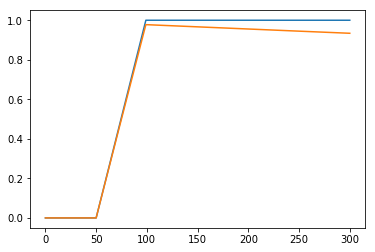

In [204]:
#C = 1*10**(-12)
#R = 1*10**16
#tau = R*C 

#Qout = Qs * 1/2 * tm/ tcs     Radeka
#Qs = charge on electrode, tm = time duration of measurement, tcs = carrier transit time through channel
#dIout/ dQin = 1/tc, tc = transit time,  


tau = 4400
print(tau)
def add_exp_decay(sig):
    #sig = np.multiply(sig, 1000)
    for i in range(0, len(sig) ,1):
        sig[i] = sig[i] * np.exp(-i/tau)
    return sig
    #1./tau*np.exp(-t/tau)


sig = make_sample_signal()
#sig = np.multiply(sig, 1/C)
plt.plot(sig)
sig = add_exp_decay(sig)
plt.plot(sig)
#plt.xlim([50,100])
plt.show()

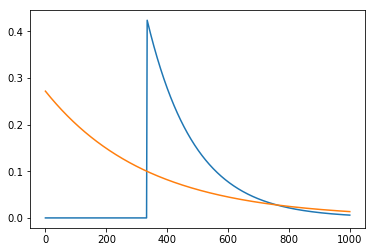

In [136]:
def func(x, a, c, d):
    return a*np.exp(-c*x)+d

def Decay(t,tau,t0):
    ''' Decay expoential and step function '''
    return 1./tau*np.exp(-t/tau) * 0.5*(np.sign(t-t0)+1.0)

def ExpDecay(t,tau,t0):
    ''' Decay expoential and step function '''
    return 1./tau*np.exp(-t/tau) * 0.5 #* 0.5*(np.sign(t-t0)+1.0)

tau = 2.344
t0 = 0
t = np.linspace(-10,10,1000) 
t_response = np.linspace(-5,10,1000)# Time domain of response function

r = Decay(t_response,tau,t0)


tau = 5
t0 = 0
t = np.linspace(-10,10,1000) 
t_response = np.linspace(-5,10,1000)# Time domain of response function

s = ExpDecay(t_response,tau,t0)

plt.plot(r)
plt.plot(s)
plt.show()


In [52]:
# event_number is related to the delta_x. delta_y in event sim
number_interactions_total = 9
number_strips = 6
number_samples = 301
# times = GetTimeBetweenDecays(10)
# print(times)
# times = [0, 1000, 2000, 3000]
###data = ImportData()
##PlotSignalGridSim(data, 0)
##PlotSignalGridSim(data, 1)
##PlotSignalGridSim(data, 2)
##PlotSignalGridSim(data, 3)
###event_num = 0
###signal0 = data[event_num][0][0:301] #i = event_number, k=strip, j = number_sample
signal0 = sig0
# signal1 = data[event_num][1][0:301]
# signal2 = data[event_num][2][0:301]
# signal3 = data[event_num][3][0:301]
# signal4 = data[event_num][4][0:301]
# signal5 = data[event_num][5][0:301]
# align starting points of signal
#test_shifter()
xdata = signal0
xerror = noise_level = 1
signal0_1 = add_noise(sig0, noise_level) # signal0 #data[1][0][0:301]
signal0_2 = add_noise(sig0, noise_level) # signal0 #data[2][0][0:301]
xerror = noise_level
signal0_1, chi2_0_1 = shift_signal(signal0, signal0_1)
signal0_2, chi2_0_2 = shift_signal(signal0, signal0_2)
print('chi ',chi2_0_1)
print(chi2_0_2)
signal0_1 = data[1][0][0:301]
signal0_2 = data[2][0][0:301]
signal0_1, chi2_1_2 = shift_signal(signal0_1, signal0_2)
print(chi2_1_2)
# adjust height of signal


chi2_compare_all_strips(0)
#chi2_compare_all_strips(0)
#
#chi2_compare_all_strips(1)
#2 interactions?
sys.exit()

shift_signal(signal0, signal1)
shift_signal(signal0, signal2)
shift_signal(signal0, signal3)
shift_signal(signal0, signal4)
shift_signal(signal0, signal5)
sys.exit()


#chi_squared = np.sum(((sig-sig0)/xerror)**2)
#reduced_chi_squared = (chi_squared)/(len(xdata)-len(xdata) + 1)

# calculate chisq of signals

# calculate position resolution of signals


sys.exit()


TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [51]:
# 